In [1]:
# personal imports
import prepare
import explore
import NLP_func_jess
# typical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from PIL import Image
# modeling methods
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# working with dates
from datetime import datetime
import time

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

#clean look
import warnings
warnings.filterwarnings("ignore")

import re
import unicodedata
import pandas as pd
import nltk
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

<Figure size 432x288 with 0 Axes>

# Basic Prep

In [2]:
tik = pd.read_csv('tiktok_final_data.csv')

In [3]:
tik.drop(columns = ['Unnamed: 0', 'total_likes', 'total_videos', 'duration'], inplace = True)

In [4]:
tik['engagement'] = (tik.comments+tik.likes+tik.views+tik.shares)/tik.total_followers

In [5]:
tik.drop(columns = ['comments', 'likes', 'views', 'shares', 'hashtag', 'date'], inplace = True)

In [6]:
#separate data based on category, into their own dataframe
tik_fas = tik[tik.category == 'fashion']
tik_fit = tik[tik.category == 'fitness & lifestyle']
tik_foo = tik[tik.category == 'food']
tik_pol = tik[tik.category == 'political']
tik_hum = tik[tik.category == 'humor']

In [7]:
#drop category as a column
tik_fas.drop(columns = ['category'], inplace = True)
tik_fit.drop(columns = ['category'], inplace = True)
tik_foo.drop(columns = ['category'], inplace = True)
tik_pol.drop(columns = ['category'], inplace = True)
tik_hum.drop(columns = ['category'], inplace = True)

In [8]:
def basic_clean(t):
    article = t.lower()
    article1 = unicodedata.normalize('NFKD', article).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    article2 = re.sub(r"[^a-z\s']", '', article1)
    return article2

In [9]:
#set description as a string to prep for basic clean
tik_fas.description = tik_fas.description.astype('str')
tik_fit.description = tik_fit.description.astype('str')
tik_foo.description = tik_foo.description.astype('str')
tik_pol.description = tik_pol.description.astype('str')
tik_hum.description = tik_hum.description.astype('str')

In [10]:
#apply basic clean
tik_fas.description = tik_fas.description.apply(basic_clean)
tik_fit.description = tik_fit.description.apply(basic_clean)
tik_foo.description = tik_foo.description.apply(basic_clean)
tik_pol.description = tik_pol.description.apply(basic_clean)
tik_hum.description = tik_hum.description.apply(basic_clean)

In [11]:
fas_words = ' '.join(tik_fas.description)
fit_words = ' '.join(tik_fit.description)
foo_words = ' '.join(tik_foo.description)
pol_words = ' '.join(tik_pol.description)
hum_words = ' '.join(tik_hum.description)

# Measure words by frequency

(-0.5, 399.5, 199.5, -0.5)

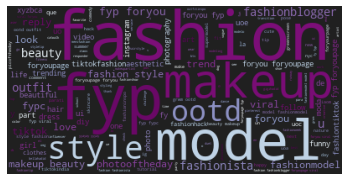

In [12]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(fas_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('fash_freq.png')

(-0.5, 399.5, 199.5, -0.5)

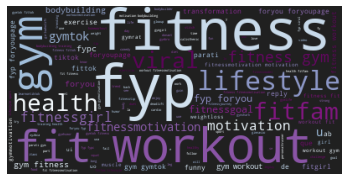

In [13]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(fit_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('fit_freq.png')

In [35]:
mask = np.array(Image.open('tiktok1.jpg'))

(-0.5, 1919.5, 1919.5, -0.5)

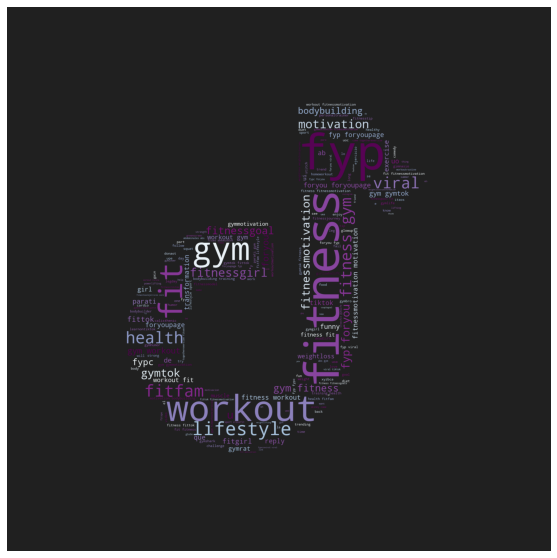

In [39]:
img = WordCloud(background_color='#202020', colormap='BuPu_r', mask=mask, contour_color='#ffffff').generate(fit_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('food_freq.png')

(-0.5, 399.5, 199.5, -0.5)

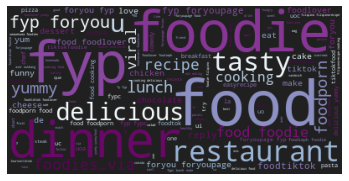

In [14]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(foo_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('food_freq.png')

(-0.5, 399.5, 199.5, -0.5)

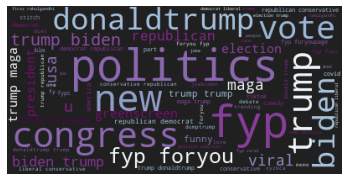

In [15]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(pol_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('pol_freq.png')

(-0.5, 399.5, 199.5, -0.5)

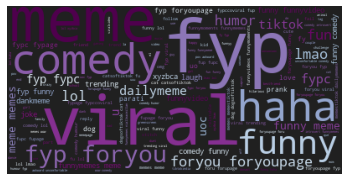

In [16]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(hum_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('hum_freq.png')

# Measure words by engagement 


# Fashion

In [17]:
#create vectors from words
x, y, tfidf = NLP_func_jess.tfidvect(tik_fas)

In [18]:
#split data, 25% test, 30% remaining in validate, the rest in train
x_train, y_train, x_val, y_val, x_test, y_test = NLP_func_jess.data_split_for_modeling(x, y)

## Start Tracking RMSE

In [19]:
rmse_sum = pd.DataFrame()

In [20]:
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

In [21]:
#Baseline

In [22]:
NLP_func_jess.rmse_median(y_train)

231.6552247452533

In [23]:
rmse_baseline_train = NLP_func_jess.rmse_median(y_train)

In [24]:
rmse_sum['train'] = [rmse_baseline_train]

In [25]:
rmse_baseline_val = NLP_func_jess.rmse_median(y_val)

In [26]:
rmse_sum['val'] = [rmse_baseline_val]

In [27]:
rmse_sum.rename(index={0:'baseline'}, inplace=True)

In [28]:
y_train.drop(columns=['med'], inplace=True)
y_val.drop(columns=['med'], inplace=True)

# Models

In [29]:
# Convert tfidvect arrays format to prep to feed to models
x_train = x_train.toarray()
x_val = x_val.toarray()
x_test = x_test.toarray()

In [30]:
rmse_train, rmse_val = NLP_func_jess.lasolars(x_train, y_train, x_val, y_val)

RMSE for OLS using Lars
Training/In-Sample:  202.42092737773902 
Validation/Out-of-Sample:  213.23861274634564


In [31]:
df = pd.DataFrame(index = ['lassolars'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [32]:
rmse_sum = pd.concat([rmse_sum, df])

In [33]:
rmse_train, rmse_val = NLP_func_jess.glm_p1(x_train, y_train, x_val, y_val)

RMSE for OLS using GLM
Training/In-Sample:  74.4567973640764 
Validation/Out-of-Sample:  198.82293887057588


In [34]:
df = pd.DataFrame(index = ['GLM'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [35]:
rmse_sum = pd.concat([rmse_sum, df])

In [36]:
#----Next two lines were added post model analysis to obtain variables for word clouds

In [37]:
rmse_train, rmse_val, glm = NLP_func_jess.glm_p2(x_train, y_train, x_val, y_val)

RMSE for OLS using GLM
Training/In-Sample:  74.4567973640764 
Validation/Out-of-Sample:  198.82293887057588


In [38]:
fash_word = NLP_func_jess.glm_eng_word_prep(glm, tfidf)

In [39]:
#--------------------

In [40]:
rmse_train, rmse_val = NLP_func_jess.linreg(x_train, y_train, x_val, y_val)

RMSE for OLS using LinearRegression
Training/In-Sample:  12.972987156870799 
Validation/Out-of-Sample:  1422.248640128551


In [41]:
df = pd.DataFrame(index = ['lin_reg'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [42]:
rmse_sum = pd.concat([rmse_sum, df])

In [43]:
rmse_train, rmse_val = NLP_func_jess.rand_for_reg(x_train, y_train, x_val, y_val)

RMSE for OLS using RandomForestRegression
Training/In-Sample:  147.41374896792817 
Validation/Out-of-Sample:  213.51800932428023


In [44]:
df = pd.DataFrame(index = ['rand_for_reg'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [45]:
rmse_sum = pd.concat([rmse_sum, df])

In [46]:
rmse_sum.sort_values('val')

,train,val
GLM,74.456797,198.822939
lassolars,202.420927,213.238613
rand_for_reg,147.413749,213.518009
baseline,231.655225,221.490330
lin_reg,12.972987,1422.248640


# Fashion Summary

<AxesSubplot:>

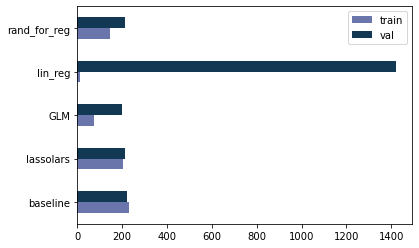

In [47]:
rmse_sum.plot.barh(color = ['#6975AB','#133854'])

# Fitness

In [18]:
#create vectors from words
x, y, tfidf = NLP_func_jess.tfidvect(tik_fit)

In [19]:
#split data, 25% test, 30% remaining in validate, the rest in train
x_train, y_train, x_val, y_val, x_test, y_test = NLP_func_jess.data_split_for_modeling(x, y)

## Start Tracking RMSE

In [20]:
rmse_sum = pd.DataFrame()

In [21]:
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

In [22]:
#Baseline

In [23]:
NLP_func_jess.rmse_median(y_train)

339.9184464813365

In [24]:
rmse_baseline_train = NLP_func_jess.rmse_median(y_train)

In [25]:
rmse_sum['train'] = [rmse_baseline_train]

In [26]:
rmse_baseline_val = NLP_func_jess.rmse_median(y_val)

In [27]:
rmse_sum['val'] = [rmse_baseline_val]

In [28]:
rmse_sum.rename(index={0:'baseline'}, inplace=True)

In [29]:
y_train.drop(columns=['med'], inplace=True)
y_val.drop(columns=['med'], inplace=True)

# Models

In [30]:
# Convert tfidvect arrays format to prep to feed to models
x_train = x_train.toarray()
x_val = x_val.toarray()
x_test = x_test.toarray()

In [31]:
rmse_train, rmse_val = NLP_func_jess.lasolars(x_train, y_train, x_val, y_val)

RMSE for OLS using Lars
Training/In-Sample:  217.17763826323176 
Validation/Out-of-Sample:  243.87652346300172


In [32]:
df = pd.DataFrame(index = ['lassolars'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [33]:
rmse_sum = pd.concat([rmse_sum, df])

In [34]:
rmse_train, rmse_val = NLP_func_jess.glm_p1(x_train, y_train, x_val, y_val)

RMSE for OLS using GLM
Training/In-Sample:  78.2604996858671 
Validation/Out-of-Sample:  226.63083031867603


In [35]:
df = pd.DataFrame(index = ['GLM'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [36]:
rmse_sum = pd.concat([rmse_sum, df])

In [37]:
#----Next two lines were added post model analysis to obtain variables for word clouds

In [38]:
rmse_train, rmse_val, glm = NLP_func_jess.glm_p2(x_train, y_train, x_val, y_val)

RMSE for OLS using GLM
Training/In-Sample:  78.2604996858671 
Validation/Out-of-Sample:  226.63083031867603


In [39]:
fit_word = NLP_func_jess.glm_eng_word_prep(glm, tfidf)

In [40]:
#--------------------

In [ ]:
rmse_train, rmse_val = NLP_func_jess.linreg(x_train, y_train, x_val, y_val)

In [ ]:
df = pd.DataFrame(index = ['lin_reg'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [ ]:
rmse_sum = pd.concat([rmse_sum, df])

In [ ]:
rmse_train, rmse_val = NLP_func_jess.rand_for_reg(x_train, y_train, x_val, y_val)

In [ ]:
df = pd.DataFrame(index = ['rand_for_reg'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [ ]:
rmse_sum = pd.concat([rmse_sum, df])

In [ ]:
rmse_sum.sort_values('val')

# Fitness Summary

In [ ]:
rmse_sum.plot.barh(color = ['#6975AB','#133854'])

# Food

In [79]:
#create vectors from words
x, y, tfidf = NLP_func_jess.tfidvect(tik_foo)

In [80]:
#split data, 25% test, 30% remaining in validate, the rest in train
x_train, y_train, x_val, y_val, x_test, y_test = NLP_func_jess.data_split_for_modeling(x, y)

## Start Tracking RMSE

In [81]:
rmse_sum = pd.DataFrame()

In [82]:
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

In [83]:
#Baseline

In [84]:
NLP_func_jess.rmse_median(y_train)

456.3302532311021

In [85]:
rmse_baseline_train = NLP_func_jess.rmse_median(y_train)

In [86]:
rmse_sum['train'] = [rmse_baseline_train]

In [87]:
rmse_baseline_val = NLP_func_jess.rmse_median(y_val)

In [88]:
rmse_sum['val'] = [rmse_baseline_val]

In [89]:
rmse_sum.rename(index={0:'baseline'}, inplace=True)

In [90]:
y_train.drop(columns=['med'], inplace=True)
y_val.drop(columns=['med'], inplace=True)

# Models

In [91]:
# Convert tfidvect arrays format to prep to feed to models
x_train = x_train.toarray()
x_val = x_val.toarray()
x_test = x_test.toarray()

In [92]:
rmse_train, rmse_val = NLP_func_jess.lasolars(x_train, y_train, x_val, y_val)

RMSE for OLS using Lars
Training/In-Sample:  275.9956742500524 
Validation/Out-of-Sample:  292.80375373723393


In [93]:
df = pd.DataFrame(index = ['lassolars'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [94]:
rmse_sum = pd.concat([rmse_sum, df])

In [95]:
rmse_train, rmse_val = NLP_func_jess.glm_p1(x_train, y_train, x_val, y_val)

RMSE for OLS using GLM
Training/In-Sample:  86.3194627763551 
Validation/Out-of-Sample:  281.30343068781065


In [96]:
df = pd.DataFrame(index = ['GLM'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [97]:
rmse_sum = pd.concat([rmse_sum, df])

In [98]:
#----Next two lines were added post model analysis to obtain variables for word clouds

In [99]:
rmse_train, rmse_val, glm = NLP_func_jess.glm_p2(x_train, y_train, x_val, y_val)

RMSE for OLS using GLM
Training/In-Sample:  86.3194627763551 
Validation/Out-of-Sample:  281.30343068781065


In [100]:
food_word = NLP_func_jess.glm_eng_word_prep(glm, tfidf)

In [101]:
#--------------------

In [102]:
rmse_train, rmse_val = NLP_func_jess.linreg(x_train, y_train, x_val, y_val)

RMSE for OLS using LinearRegression
Training/In-Sample:  8.901476501278712 
Validation/Out-of-Sample:  638.4192531540557


In [103]:
df = pd.DataFrame(index = ['lin_reg'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [104]:
rmse_sum = pd.concat([rmse_sum, df])

In [105]:
rmse_train, rmse_val = NLP_func_jess.rand_for_reg(x_train, y_train, x_val, y_val)

RMSE for OLS using RandomForestRegression
Training/In-Sample:  256.6221743439119 
Validation/Out-of-Sample:  296.22782949077975


In [106]:
df = pd.DataFrame(index = ['rand_for_reg'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [107]:
rmse_sum = pd.concat([rmse_sum, df])

In [108]:
rmse_sum.sort_values('val')

,train,val
GLM,86.319463,281.303431
lassolars,275.995674,292.803754
rand_for_reg,256.622174,296.227829
baseline,456.330253,301.571672
lin_reg,8.901477,638.419253


# Food Summary

<AxesSubplot:>

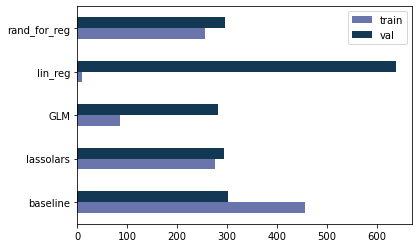

In [109]:
rmse_sum.plot.barh(color = ['#6975AB','#133854'])

# Humor

In [110]:
#create vectors from words
x, y, tfid = NLP_func_jess.tfidvect(tik_hum)

In [111]:
#split data, 25% test, 30% remaining in validate, the rest in train
x_train, y_train, x_val, y_val, x_test, y_test = NLP_func_jess.data_split_for_modeling(x, y)

## Start Tracking RMSE

In [112]:
rmse_sum = pd.DataFrame()

In [113]:
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

In [114]:
#Baseline

In [115]:
NLP_func_jess.rmse_median(y_train)

300.20058896035096

In [116]:
rmse_baseline_train = NLP_func_jess.rmse_median(y_train)

In [117]:
rmse_sum['train'] = [rmse_baseline_train]

In [118]:
rmse_baseline_val = NLP_func_jess.rmse_median(y_val)

In [119]:
rmse_sum['val'] = [rmse_baseline_val]

In [120]:
rmse_sum.rename(index={0:'baseline'}, inplace=True)

In [121]:
y_train.drop(columns=['med'], inplace=True)
y_val.drop(columns=['med'], inplace=True)

# Models

In [122]:
# Convert tfidvect arrays format to prep to feed to models
x_train = x_train.toarray()
x_val = x_val.toarray()
x_test = x_test.toarray()

In [123]:
rmse_train, rmse_val = NLP_func_jess.lasolars(x_train, y_train, x_val, y_val)

RMSE for OLS using Lars
Training/In-Sample:  266.51508267049246 
Validation/Out-of-Sample:  291.99573145983646


In [124]:
df = pd.DataFrame(index = ['lassolars'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [125]:
rmse_sum = pd.concat([rmse_sum, df])

In [126]:
rmse_train, rmse_val = NLP_func_jess.glm_p1(x_train, y_train, x_val, y_val)

RMSE for OLS using GLM
Training/In-Sample:  93.56351977355263 
Validation/Out-of-Sample:  280.0284293622842


In [127]:
df = pd.DataFrame(index = ['GLM'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [128]:
rmse_sum = pd.concat([rmse_sum, df])

In [129]:
#----Next two lines were added post model analysis to obtain variables for word clouds

In [130]:
rmse_train, rmse_val, glm = NLP_func_jess.glm_p2(x_train, y_train, x_val, y_val)

RMSE for OLS using GLM
Training/In-Sample:  93.56351977355263 
Validation/Out-of-Sample:  280.0284293622842


In [131]:
hum_word = NLP_func_jess.glm_eng_word_prep(glm, tfidf)

In [132]:
#--------------------

In [133]:
rmse_train, rmse_val = NLP_func_jess.linreg(x_train, y_train, x_val, y_val)

RMSE for OLS using LinearRegression
Training/In-Sample:  42.89021236657574 
Validation/Out-of-Sample:  631.9811844703075


In [134]:
df = pd.DataFrame(index = ['lin_reg'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [135]:
rmse_sum = pd.concat([rmse_sum, df])

In [136]:
rmse_train, rmse_val = NLP_func_jess.rand_for_reg(x_train, y_train, x_val, y_val)

RMSE for OLS using RandomForestRegression
Training/In-Sample:  223.1998533091403 
Validation/Out-of-Sample:  290.49881998298537


In [137]:
df = pd.DataFrame(index = ['rand_for_reg'], data = {'train': [rmse_train], 'val':[rmse_val]})

In [138]:
rmse_sum = pd.concat([rmse_sum, df])

In [139]:
rmse_sum.sort_values('val')

,train,val
GLM,93.563520,280.028429
rand_for_reg,223.199853,290.498820
lassolars,266.515083,291.995731
baseline,300.200589,311.444779
lin_reg,42.890212,631.981184


In [140]:
# Humor Summary

<AxesSubplot:>

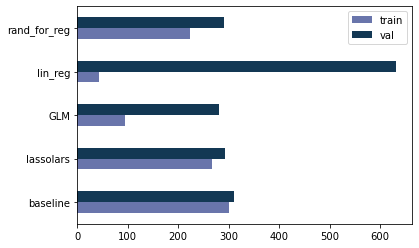

In [141]:
rmse_sum.plot.barh(color = ['#6975AB','#133854'])
#plt.figure(figsize =(12,16))
#plt.savefig('NLP_model_sum.png')
#plt.savefig('NLP_model_sum1.pdf', bbox_inches='tight')

# Takeaway
GLM was the best for each one. Determine eng score for individual words

# Word Cloud based on engagement

(-0.5, 799.5, 399.5, -0.5)

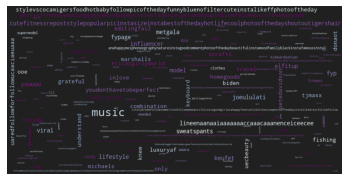

In [142]:
img = WordCloud(background_color='#202020', colormap='BuPu_r', width = 800, height = 400).generate_from_frequencies(fash_word)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('fash_eng1.png')

In [291]:
fash_pd = pd.DataFrame.from_dict(fash_word, orient= 'index')

In [292]:
fash_20 = fash_pd.sort_values(0,ascending=False).head(20)

In [293]:
fash_dic = dict(zip(fash_20.index, fash_20[0]))

In [1]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate_from_frequencies(fash_dic)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('fash_eng2.png')

NameError: name 'WordCloud' is not defined

(-0.5, 399.5, 199.5, -0.5)

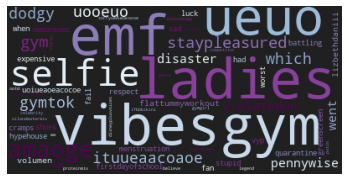

In [147]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate_from_frequencies(fit_word)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('fit_eng.png')

(-0.5, 399.5, 199.5, -0.5)

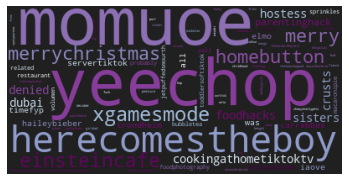

In [148]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate_from_frequencies(food_word)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('food_eng.png')

(-0.5, 399.5, 199.5, -0.5)

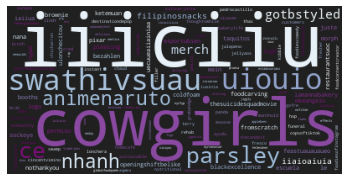

In [149]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate_from_frequencies(hum_word)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('hum_eng.png')

In [42]:
fit_word

{'aa': 0.37367031805479417,
 'aaa': -0.17160805997733902,
 'aaaa': 0.3603039731528229,
 'aaaaaeaaceoaaaoaeaeoalifestyle': 0.0,
 'aaaaueo': 0.0,
 'aaac': 0.08030926837721276,
 'aaaea': -0.033725108529821,
 'aaaecae': -0.0009496659808475731,
 'aaaeo': 0.0,
 'aac': 0.3603039731528229,
 'aaca': 0.2338765634777077,
 'aacaa': 0.0,
 'aaceea': -0.033725108529821,
 'aacna': -0.033725108529821,
 'aacnca': 0.0,
 'aaco': 0.3780969704218759,
 'aae': 0.10080284497410674,
 'aaeenc': 0.0,
 'aaeeo': 0.39384057797479943,
 'aaeeoeaeaeae': 0.39384057797479943,
 'aaeioeia': 0.0,
 'aagym': 0.0,
 'aancaaaofitnesfitfitnessprank': 0.0,
 'aaneieeuiueuiueuiueuiueuiueuiueuiueuiueuiueuiueuiueuiueuiueuiueuiueuuuefollow': 0.0,
 'aaoaa': 0.0,
 'aaoe': 0.06907148901928996,
 'aaoefyp': -0.039676476230135344,
 'aapifamily': -0.10973643787703481,
 'aaron': 0.024036620553010313,
 'aau': 0.39384057797479943,
 'aaunga': -0.07387617082220689,
 'ab': -0.4950137621781643,
 'abajoui': -0.05571061871690379,
 'abbydutt': -0.22946

In [150]:
#BuPu_r

In [151]:
#202020